# Cuisine Prediction


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
recipe = pd.read_json('/content/drive/MyDrive/train.json')

In [ ]:
print('Shape:',recipe.shape)
print('Columns:',recipe.columns)

print('Whether Null exists:\n',recipe.isnull().sum())

Shape: (39774, 3)
Columns: Index(['id', 'cuisine', 'ingredients'], dtype='object')
Whether Null exists:
 id             0
cuisine        0
ingredients    0
dtype: int64


In [ ]:
recipe['cuisine'].nunique()

20

In [ ]:
recipe['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [ ]:
recipe['ingredients'][0]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [ ]:
recipe['ingredients'][6]

['olive oil',
 'salt',
 'medium shrimp',
 'pepper',
 'garlic',
 'chopped cilantro',
 'jalapeno chilies',
 'flat leaf parsley',
 'skirt steak',
 'white vinegar',
 'sea salt',
 'bay leaf',
 'chorizo sausage']

In [ ]:
recipe['cuisine'].value_counts()

,count
cuisine,
italian,7838
mexican,6438
southern_us,4320
indian,3003
chinese,2673
french,2646
cajun_creole,1546
thai,1539
japanese,1423


In [ ]:
# bar plot for count of entries for each cuisine
x = recipe['cuisine'].value_counts().index
y = recipe['cuisine'].value_counts().values

df = pd.DataFrame({
    'Cuisine':x,
    'These many entries':y
})
#fig = sns.countplot(recipe['cuisine'])
fig = px.bar(df,
             x='Cuisine',
             y='These many entries',
             color='Cuisine')
fig.show()


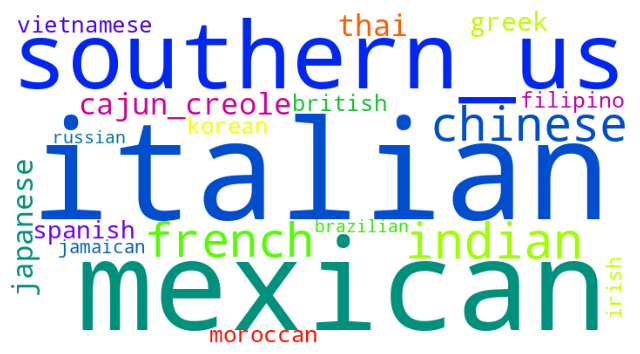

In [ ]:
from wordcloud import WordCloud
x= recipe['cuisine'].values

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 712,
                    height = 384,
                    colormap = 'prism'    ).generate(' '.join(x))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('cuisines.png')
plt.show()

In [ ]:
all_ingredients = [] # list to store all ingredients
for indiv_ingredient_list in recipe['ingredients'].values:
    for ingredient in indiv_ingredient_list:
        all_ingredients.append(ingredient)

In [ ]:
len(all_ingredients) # 4 lacs ingredients

428275

In [ ]:
# Convert that list in a Pandas DataFrame so that we can apply value_counts
ingredients_together = pd.DataFrame(all_ingredients)
ingredients_together


,0
0,romaine lettuce
1,black olives
2,grape tomatoes
3,garlic
4,pepper
...,...
428270,garlic
428271,white sugar
428272,roma tomatoes
428273,celery


In [ ]:
ingredients_together.value_counts()[0:30] # for first 30

,count
0,
salt,18049
onions,7972
olive oil,7972
water,7457
garlic,7380
sugar,6434
garlic cloves,6237
butter,4848
ground black pepper,4785


In [ ]:
# bar plot for count of entries for each cuisine
x = ingredients_together.value_counts()[0:30].index.tolist()
y = ingredients_together.value_counts()[0:30].values

df = pd.DataFrame({
    'Ingredient':x,
    'These many entries':y
})
#fig = sns.countplot(recipe['cuisine'])
fig = px.pie(df,
             names='Ingredient',
             values='These many entries',
             color='Ingredient')
fig.show()


In [ ]:
recipe['cuisine'].value_counts()

,count
cuisine,
italian,7838
mexican,6438
southern_us,4320
indian,3003
chinese,2673
french,2646
cajun_creole,1546
thai,1539
japanese,1423


In [ ]:
recipe['cuisine'] = recipe['cuisine'].map({'italian':1,
                       'mexican':2,
                       'southern_us':3,
                       'indian':4,
                       'chinese':5,
                       'french':6,
                       'cajun_creole':7,
                       'thai':8,
                       'japanese':9,
                       'greek':10,
                       'spanish':11,
                       'korean':12,
                       'vietnamese':13,
                       'moroccan':14,
                       'british':15,
                       'filipino':16,
                       'irish':17,
                       'jamaican':18,
                       'russian':19,
                       'brazilian':20
})

In [ ]:
X = recipe.iloc[:,-1]
y = recipe['cuisine']
X

,ingredients
0,"[romaine lettuce, black olives, grape tomatoes..."
1,"[plain flour, ground pepper, salt, tomatoes, g..."
2,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,"[water, vegetable oil, wheat, salt]"
4,"[black pepper, shallots, cornflour, cayenne pe..."
...,...
39769,"[light brown sugar, granulated sugar, butter, ..."
39770,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,"[boneless chicken skinless thigh, minced garli..."


In [ ]:
y

,cuisine
0,10
1,3
2,16
3,4
4,4
...,...
39769,17
39770,1
39771,17
39772,5


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
X_train

,ingredients
31255,"[yellow onion, hot water, ground turmeric, fre..."
32399,"[lime juice, zucchini, chili powder, salt, dri..."
34614,"[fresh ginger, cauliflower florets, lemon juic..."
22301,"[fish sauce, pepper, garlic, calamansi, broth,..."
4688,"[water, salt, celery, onions, chicken stock, v..."
...,...
7813,"[orange juice concentrate, garlic cloves, fres..."
32511,"[grated parmesan cheese, fresh basil leaves, e..."
5192,"[basil leaves, olive oil, extra-virgin olive o..."
12172,"[powdered sugar, large egg yolks, salt, heavy ..."


In [ ]:
X_train['ingredients'] = X_train['ingredients'].apply(lambda x:  ' '.join(x))
X_test['ingredients'] = X_test['ingredients'].apply(lambda x:  ' '.join(x))
X_train

,ingredients
31255,yellow onion hot water ground turmeric fresh g...
32399,lime juice zucchini chili powder salt dried or...
34614,fresh ginger cauliflower florets lemon juice f...
22301,fish sauce pepper garlic calamansi broth gluti...
4688,water salt celery onions chicken stock vegetab...
...,...
7813,orange juice concentrate garlic cloves fresh c...
32511,grated parmesan cheese fresh basil leaves eggp...
5192,basil leaves olive oil extra-virgin olive oil ...
12172,powdered sugar large egg yolks salt heavy whip...


In [ ]:
X_test

,ingredients
25674,water yoghurt peanut oil ground cumin ground c...
3666,lemon zest whipping cream yellow corn meal bak...
27481,salad dressing chuck roast garlic ground black...
36750,sesame seeds worcestershire sauce cucumber pep...
31926,bay leaves cayenne pepper ground cloves vegeta...
...,...
23536,shredded cheddar cheese ricotta cheese eggs Al...
30857,cajun seasoning onions water hot Italian sausa...
36586,eggplant large garlic cloves veal shanks large...
17770,ground pepper cilantro scallions seedless cucu...


In [ ]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['ingredients']).toarray()
X_test_bow = cv.transform(X_test['ingredients']).toarray()
X_train_bow.shape

(31819, 2887)

Accuracy: 0.24349465744814583


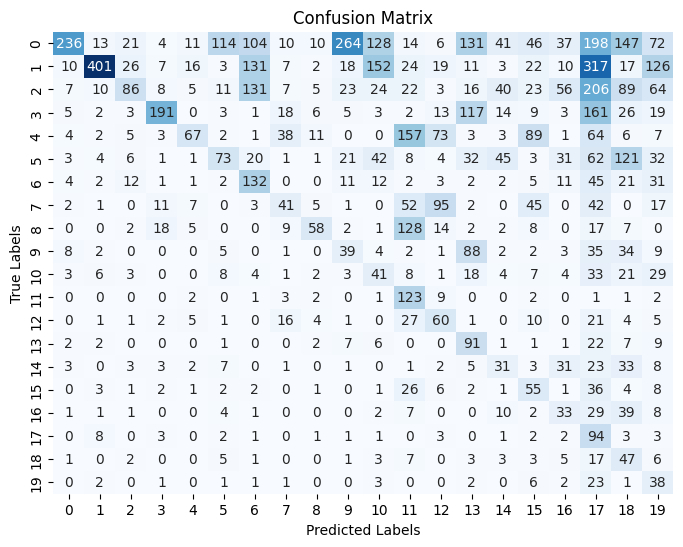

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you already have X_train_bow, y_train, X_test_bow, and y_test

# Create and fit the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test_bow)

# # Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
# metrics for GNB
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.24349465744814583
Precision: 0.5406115655870979
Recall: 0.24349465744814583
Confusion Matrix:
[[236  13  21   4  11 114 104  10  10 264 128  14   6 131  41  46  37 198
  147  72]
 [ 10 401  26   7  16   3 131   7   2  18 152  24  19  11   3  22  10 317
   17 126]
 [  7  10  86   8   5  11 131   7   5  23  24  22   3  16  40  23  56 206
   89  64]
 [  5   2   3 191   0   3   1  18   6   5   3   2  13 117  14   9   3 161
   26  19]
 [  4   2   5   3  67   2   1  38  11   0   0 157  73   3   3  89   1  64
    6   7]
 [  3   4   6   1   1  73  20   1   1  21  42   8   4  32  45   3  31  62
  121  32]
 [  4   2  12   1   1   2 132   0   0  11  12   2   3   2   2   5  11  45
   21  31]
 [  2   1   0  11   7   0   3  41   5   1   0  52  95   2   0  45   0  42
    0  17]
 [  0   0   2  18   5   0   0   9  58   2   1 128  14   2   2   8   0  17
    7   0]
 [  8   2   0   0   0   5   0   1   0  39   4   2   1  88   2   2   3  35
   34   9]
 [  3   6   3   0   0   8   4   1   2   3  4

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with 100 estimators and a random state
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the training data
rf_classifier.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_bow)

# Import the necessary metrics module
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Create a confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print accuracy and confusion matrix
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)


Accuracy: 0.7524827152734129
Confusion Matrix:
 [[1460   27   38    8    3   50    4    1    1    9    0    0    1    0
     1    0    2    0    2    0]
 [  38 1222   28    4    3   16    0    1    1    0    6    0    0    2
     0    0    0    0    0    1]
 [  55   47  650    5    4   24   39    0    3    2    2    0    1    1
     0    1    1    0    0    1]
 [   8   17    9  548    1    2    0    4    0    4    0    0    0    6
     0    1    0    1    0    0]
 [   8    6   14    6  469    2    1    6   10    1    0    5    2    0
     0    6    0    0    0    0]
 [ 151   12   52    2    1  275    5    0    3    0    0    0    1    1
     1    1    5    0    1    0]
 [  30   21   46    0    2    6  191    0    0    1    1    0    0    0
     0    1    0    0    0    0]
 [   2   15    3   16   18    1    0  252    3    1    0    2    7    0
     0    4    0    0    0    0]
 [  15    4    7   31   39    5    0    2  165    2    0    2    1    0
     0    0    0    0    0    0]
 [  72 

In [ ]:
# metrics for RFC
# metrics for GNB
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
confusion = confusion_matrix(y_test, y_pred_rf)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.7524827152734129
Precision: 0.7614525421974913
Recall: 0.7524827152734129
Confusion Matrix:
[[1460   27   38    8    3   50    4    1    1    9    0    0    1    0
     1    0    2    0    2    0]
 [  38 1222   28    4    3   16    0    1    1    0    6    0    0    2
     0    0    0    0    0    1]
 [  55   47  650    5    4   24   39    0    3    2    2    0    1    1
     0    1    1    0    0    1]
 [   8   17    9  548    1    2    0    4    0    4    0    0    0    6
     0    1    0    1    0    0]
 [   8    6   14    6  469    2    1    6   10    1    0    5    2    0
     0    6    0    0    0    0]
 [ 151   12   52    2    1  275    5    0    3    0    0    0    1    1
     1    1    5    0    1    0]
 [  30   21   46    0    2    6  191    0    0    1    1    0    0    0
     0    1    0    0    0    0]
 [   2   15    3   16   18    1    0  252    3    1    0    2    7    0
     0    4    0    0    0    0]
 [  15    4    7   31   39    5    0    2  165    2    0

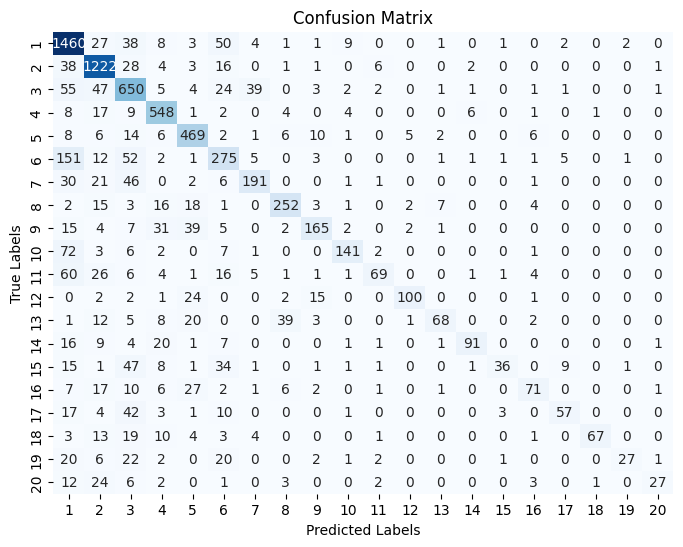

Accuracy: 0.7524827152734129


In [ ]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Define class labels (cuisine names)
class_labels = sorted(y_test.unique())

# Plot the confusion matrix with labels and colors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy and confusion matrix
print("Accuracy:", accuracy_rf)
# print("Confusion Matrix:\n", confusion_matrix_rf)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_regression.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test_bow)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.7841609050911377


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# metrics for LR
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
confusion = confusion_matrix(y_test, y_pred_lr)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.7841609050911377
Precision: 0.7819701145613963
Recall: 0.7841609050911377
Confusion Matrix:
[[1401   21   38    3    0   74   11    1    3   21   17    0    0    1
     7    1    2    1    3    2]
 [  28 1205   38    8    3   11    3    3    0    0   13    0    0    0
     2    1    1    0    1    5]
 [  27   21  663    6    2   26   42    1    4    4   10    1    1    1
    11    2    5    3    1    5]
 [   6   11    9  525    1    5    0    5    8    6    0    2    0   13
     2    2    2    3    0    1]
 [   6    5    6    3  445    3    2   10   16    1    0   12   14    0
     0   11    0    1    1    0]
 [  99    5   28    2    1  320    7    0    3    1   11    1    0    2
     5    1   11    2   11    1]
 [  16    7   54    1    1    8  204    0    0    0    3    0    0    0
     1    0    1    0    3    0]
 [   1    6    3   10   11    0    0  255    7    1    0    3   20    1
     0    3    1    1    0    1]
 [  11    1    3   27   23    4    1    2  187    0    0

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

KeyboardInterrupt: 

In [ ]:
# metrics for SVC
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
confusion = confusion_matrix(y_test, y_pred_svm)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.7728472658705217
Precision: 0.7699774746373639
Recall: 0.7728472658705217
Confusion Matrix:
[[1410   17   44    5    1   68    4    0    2   21   17    0    1    1
     3    3    4    2    4    0]
 [  37 1191   36   10    2   14    1    3    0    2   10    1    2    1
     0    4    1    2    0    5]
 [  37   25  652    5    7   28   45    0    2    3    6    2    0    0
     7    4    3    2    5    3]
 [  10   13    6  525    1    6    0    3    7    9    0    1    0    9
     0    3    2    4    1    1]
 [   9   10    3    2  448    1    2   16   14    0    1    9   11    0
     0   10    0    0    0    0]
 [ 111    9   29    1    1  317    7    0    2    0    9    0    0    1
     4    2    8    1    9    0]
 [  18   11   53    0    1    5  203    0    1    0    1    0    1    0
     0    0    1    1    3    0]
 [   2    8    4   10   15    0    0  244    4    1    0    3   26    1
     0    3    0    1    0    2]
 [  11    5    0   23   25    7    0    2  182    0    0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-NN classifier with k=5 (you can adjust k)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifier.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-NN Accuracy:", accuracy_knn)

KeyboardInterrupt: 

In [ ]:
# metrics for KNN
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
confusion = confusion_matrix(y_test, y_pred_knn)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.6441231929604022
Precision: 0.6436600266783752
Recall: 0.6441231929604022
Confusion Matrix:
[[1384   45   38   14    2   68    8    5    2   17    9    1    1    3
     3    0    4    0    0    3]
 [ 108 1101   41   12    2   21    4    4    1    4    7    1    0    4
     3    6    3    0    0    0]
 [  98   66  537   10    2   52   30    0    3    3    9    0    2    2
    11    1    4    0    2    4]
 [  44   54   14  444    1    4    1    6    5    3    1    0    2   12
     0    3    2    4    0    1]
 [  21   20   15    6  396    3    2    2   25    0    2   20    8    0
     0   12    0    2    2    0]
 [ 186   19   50   12    4  206    2    0    0    6    7    0    0    2
     4    2    7    1    3    0]
 [  46   39   58    5    3    8  127    0    1    2    4    0    1    0
     0    1    0    2    1    1]
 [  15   29   14   17   31    3    0  163    3    0    0    7   34    0
     0    6    0    1    0    1]
 [  24   15    9   28   31    7    1    3  141    0    0

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()

# Fit the model on the training data
mnb_classifier.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred_mnb = mnb_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print("Multinomial Naive Bayes Accuracy:", accuracy_mnb)

Multinomial Naive Bayes Accuracy: 0.7220615964802012


In [ ]:
# metrics for MNB
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_mnb)
precision = precision_score(y_test, y_pred_mnb, average='weighted')
recall = recall_score(y_test, y_pred_mnb, average='weighted')
confusion = confusion_matrix(y_test, y_pred_mnb)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.7220615964802012
Precision: 0.7320005208331395
Recall: 0.7220615964802012
Confusion Matrix:
[[1246   20   70    4    0  135   23    3    0   31   32    0    0    7
    23    1    7    0    4    1]
 [  19 1143   66   16    9    9    8   10    0    3   19    1    2    1
     4    4    1    1    1    5]
 [  26   35  580   11    2   23  105    1    1    3   12    2    4    2
    11    5    4    5    3    1]
 [   5    6   15  516    0    2    1   12    1    8    0    1    1   18
     3    1    2    1    6    2]
 [   3    0    4    3  459    6    6   16    7    2    0    6    8    0
     1   10    1    2    1    1]
 [  82    5   82    1    0  270   12    1    2    8   10    0    1    4
    18    1    9    0    4    1]
 [  14    9   36    1    0    6  224    0    0    1    2    0    0    1
     3    0    0    0    2    0]
 [   1    3    7    7   19    1    0  256    4    1    0    4   16    0
     0    1    0    0    0    4]
 [   5    3   11   31   38    8    0    4  155    1    0

# Recipe from ingredients

In [ ]:
import torch
import torch.nn as nn
from transformers import GPT2TokenizerFast, GPT2LMHeadModel

from transformers import Trainer, TrainingArguments

from tqdm.auto import tqdm

import pandas as pd
import numpy as np


In [ ]:
model_name = 'gpt2'

In [ ]:
model_save_path = './reGPT'

In [ ]:
tokenizer = GPT2TokenizerFast.from_pretrained(model_name,
                                              bos_token='<|startoftext|>',
                                              eos_token='<|endoftext|>',
                                              unk_token='<|unknown|>',
                                              pad_token='<|pad|>'
                                             )
model = GPT2LMHeadModel.from_pretrained(model_name)
model.resize_token_embeddings(len(tokenizer))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(50260, 768)

In [ ]:
tokenizer.save_pretrained(model_save_path)

('./reGPT/tokenizer_config.json',
 './reGPT/special_tokens_map.json',
 './reGPT/vocab.json',
 './reGPT/merges.txt',
 './reGPT/added_tokens.json',
 './reGPT/tokenizer.json')

In [ ]:
tokenizer.convert_tokens_to_ids(['<|pad|>'])

[50259]

In [ ]:
def generate(prompt):
    inputs = tokenizer.encode_plus(prompt, return_tensors='pt')
    output = model.generate(**inputs,max_length=256,do_sample=True,pad_token_id=50259)
    print(tokenizer.decode(output[0]))

In [ ]:
tokenizer.special_tokens_map

{'bos_token': '<|startoftext|>',
 'eos_token': '<|endoftext|>',
 'unk_token': '<|unknown|>',
 'pad_token': '<|pad|>'}

In [ ]:
tokenizer.convert_tokens_to_ids(['<|startoftext|>'],)

[50257]

In [ ]:
clean = pd.read_csv('/content/drive/MyDrive/Cleaned_Indian_Food_Dataset.csv')
clean = clean.sample(frac=1)
clean.reset_index(drop=True,inplace=True)

In [ ]:
def print_recipe(idx):
    print(f"{clean['Cleaned-Ingredients'][idx]}\n\n{clean['TranslatedInstructions'][idx]}")

In [ ]:
def form_string(ingredient,instruction):
    s = f"<|startoftext|>Cleaned-Ingredients:\n{ingredient.strip()}\n\nTranslatedInstructions:\n{instruction.strip()}<|endoftext|>"
    return s

In [ ]:
data = clean.apply(lambda x:form_string(x['Cleaned-Ingredients'],x['TranslatedInstructions']),axis=1).to_list()

In [ ]:
train_size = 0.90
train_len = int(train_size * len(data))
train_data = data[:train_len]
val_data = data[train_len:]

In [ ]:
class RecipeDataset:
    def __init__(self,data):
        self.data = data
        self.input_ids = []
        self.attn_masks = []

        for item in tqdm(data):
            encodings = tokenizer.encode_plus(item,
                                              truncation=True,
                                              padding='max_length',
                                              max_length=1024,
                                              return_tensors='pt'
                                             )
            self.input_ids.append(torch.squeeze(encodings['input_ids'],0))
            self.attn_masks.append(torch.squeeze(encodings['attention_mask'],0))

    def __len__(self):
        return len(self.data)

    def __getitem__(self,idx):
        return self.input_ids[idx], self.attn_masks[idx]

In [ ]:
def collate_fn(batch):
    return {
        'input_ids': torch.stack([item[0] for item in batch]),
        'attention_mask': torch.stack([item[1] for item in batch]),
        'labels': torch.stack([item[0] for item in batch])
    }

In [ ]:
train_ds = RecipeDataset(train_data)
val_ds = RecipeDataset(val_data)

  0%|          | 0/5344 [00:00<?, ?it/s]

  0%|          | 0/594 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import accuracy_score
def compute_metrics(p):
    preds = p.predictions.argmax(axis=-1)
    labels = p.label_ids
    accuracy = accuracy_score(labels, preds)
    return {'accuracy': accuracy}

In [ ]:
args = TrainingArguments(output_dir=model_save_path,
                         per_device_train_batch_size=2,
                         per_device_eval_batch_size=2,
                         gradient_accumulation_steps=2,
                         report_to='none',
                         num_train_epochs=1,
                         save_strategy='no'
                        )

In [ ]:
optim = torch.optim.AdamW(model.parameters(),lr=5e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optim,20,eta_min=1e-7)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    optimizers=(optim, scheduler),
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

Step,Training Loss
500,2.312000
1000,0.718900


Step,Training Loss
500,2.312000
1000,0.718900


TrainOutput(global_step=1336, training_loss=1.3068280819647327, metrics={'train_runtime': 1830.3069, 'train_samples_per_second': 2.92, 'train_steps_per_second': 0.73, 'total_flos': 2792689238016000.0, 'train_loss': 1.3068280819647327, 'epoch': 1.0})

In [ ]:
trainer.save_model()

In [ ]:
from transformers import pipeline

In [ ]:
pl = pipeline(task='text-generation',model='/content/reGPT')

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
def create_prompt(ingredients):
    ingredients = ','.join([x.strip().lower() for x in ingredients.split(',')])
    ingredients = ingredients.strip().replace(',','\n')
    s = f"<|startoftext|>Ingredients:\n{ingredients}\n"
    return s

In [ ]:

ingredients =  []
while True:
    inp = input()
    if inp == "":
        break
    ingredients.append(inp)

potato
onion
tomato



In [ ]:

for ing in ingredients:
    prompt = create_prompt(ing)
    print(pl(prompt,
         max_new_tokens=512,
         penalty_alpha=0.6,
         top_k=4,
         pad_token_id=50259
        )[0]['generated_text'])

<|startoftext|>Ingredients:
potato
salt,cumin powder (jeera),coriander (dhania) leaves,red chilli powder,onion,green chillies,garam masala powder

TranslatedInstructions:
To begin making the Potato And Green Chillies Recipe, we need to first make the gravy.
Heat oil in a heavy bottomed pan; add cumin seeds, coriander and let it crackle.
Now add onions and cook for a few minutes.
After a few minutes, add tomatoes and cook for a minute.
After a few minutes, turn off the gas and garnish with chopped coriander leaves and serve the Potato And Green Chillies along with Steamed Rice, Steamed Rice and Phulka for your weekday breakfast.
<|startoftext|>Ingredients:
onion
cumin powder (jeera),salt,coriander (dhania) leaves,coriander powder,green chillies,onion,cumin seeds (jeera),green peas (matar)

TranslatedInstructions:
To begin making the Kerala Style Idli Pulao Recipe, firstly soak all the ingredients except the onions and green chillies for at least 2 hours in warm water and salt for at lea

In [ ]:
import torch

# Assuming `model` is your trained PyTorch model
torch.save(model.state_dict(), "reGPT_model.pth")


In [ ]:
# Assuming `model` is already instantiated (e.g., `model = GPT2LMHeadModel.from_pretrained('gpt2')`)
model.load_state_dict(torch.load("reGPT_model.pth"))
model.eval()  # Set the model to evaluation mode

<ipython-input-67-62927db2678b>:2: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50260, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50260, bias=False)
)